In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Reading the data file - FIATreeSpeciesCode_pft.csv
df_fia_species = pd.read_csv("./FIA/FIATreeSpeciesCode_pft.csv", sep=";")
df_fia_species_imp = df_fia_species[['SPCD', 'COMMON_NAME', 'PFT','OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']].copy()
df_fia_species_imp.head()

,SPCD,COMMON_NAME,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,10,fir spp.,Evergreen conifer,X,X,-,-,X
1,11,Pacific silver fir,Evergreen conifer,-,-,X,-,-
2,12,balsam fir,Evergreen conifer,X,X,-,-,X
3,14,Santa Lucia or bristlecone fir,Evergreen conifer,-,-,X,-,-
4,15,white fir,Evergreen conifer,X,-,X,X,X


In [3]:
# Reading the data file - CA_TREE.csv
df_fia_tree = pd.read_csv("./FIA/CA_TREE.csv", low_memory=False)
df_fia_tree_imp = df_fia_tree[['STATECD', 'PLOT', 'PLT_CN', 'UNITCD', 'COUNTYCD', 'TREE', 'SPCD', 'DIA', 'HT', 'CR']].copy()
df_fia_tree_imp.head()

,STATECD,PLOT,PLT_CN,UNITCD,COUNTYCD,TREE,SPCD,DIA,HT,CR
0,6,1,11839,1,15,675267,631.0,3.9,43.0,15.0
1,6,1,11839,1,15,675268,202.0,24.1,95.0,45.0
2,6,1,11839,1,15,675269,631.0,14.2,56.0,35.0
3,6,1,11839,1,15,675270,631.0,10.5,52.0,35.0
4,6,1,11839,1,15,675271,202.0,2.5,41.0,25.0


In [4]:
df_fia_plot = pd.read_csv("./FIA/CA_PLOT.csv", low_memory=False)
df_fia_plot_imp = df_fia_plot[['PLOT_STATUS_CD', 'LAT', 'LON', 'ELEV', 'ECOSUBCD', 'CN']].copy()
df_fia_plot_imp.head()

,PLOT_STATUS_CD,LAT,LON,ELEV,ECOSUBCD,CN
0,2,37.206646,-118.827241,10300.0,M261Eo,750083878290487
1,2,37.163388,-117.463030,3900.0,341Fd,750083879290487
2,3,41.958020,-123.291125,5500.0,M261Ao,786779832290487
3,1,41.985970,-123.130749,3700.0,M261Ao,786779833290487
4,1,41.985875,-123.196808,3500.0,M261Ao,786779834290487


In [5]:
# Analyzing the shape
print(df_fia_species_imp.shape)
print(df_fia_tree_imp.shape)
print(df_fia_plot_imp.shape)

(458, 8)
(427519, 10)
(42036, 6)


In [6]:
# Merging the files based on SPCD
df_fia = df_fia_tree_imp.merge(df_fia_species_imp, on="SPCD", how="left")

In [7]:
df_fia = df_fia.merge(df_fia_plot_imp, left_on="PLT_CN", right_on="CN", how="left")
df_fia.head()

,STATECD,PLOT,PLT_CN,UNITCD,COUNTYCD,TREE,SPCD,DIA,HT,CR,...,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,PLOT_STATUS_CD,LAT,LON,ELEV,ECOSUBCD,CN
0,6,1,11839,1,15,675267,631.0,3.9,43.0,15.0,...,-,X,-,-,1,41.478172,-123.946777,1300.0,263Ab,11839
1,6,1,11839,1,15,675268,202.0,24.1,95.0,45.0,...,X,X,X,X,1,41.478172,-123.946777,1300.0,263Ab,11839
2,6,1,11839,1,15,675269,631.0,14.2,56.0,35.0,...,-,X,-,-,1,41.478172,-123.946777,1300.0,263Ab,11839
3,6,1,11839,1,15,675270,631.0,10.5,52.0,35.0,...,-,X,-,-,1,41.478172,-123.946777,1300.0,263Ab,11839
4,6,1,11839,1,15,675271,202.0,2.5,41.0,25.0,...,X,X,X,X,1,41.478172,-123.946777,1300.0,263Ab,11839


In [8]:
print(df_fia.shape)

(427519, 23)


In [9]:
df_fia['CBH'] = df_fia["HT"] * (1 - df_fia["CR"] / 100)
df_fia[['CBH', 'HT', 'CR']].head()

,CBH,HT,CR
0,36.55,43.0,15.0
1,52.25,95.0,45.0
2,36.40,56.0,35.0
3,33.80,52.0,35.0
4,30.75,41.0,25.0


In [10]:
# Analyzing the distribution of PFT
df_fia['PFT'].value_counts()

PFT
Evergreen conifer          279767
Evergreen broadleaf         57704
Deciduous broadleaf         49594
Deciduous                   33760
Evergreen                    6431
Flowering plants              230
Unknown                         6
Broadleaf                       4
Nitrogen fixing legumes         2
Deciduous confier               2
Name: count, dtype: int64

In [11]:
df_fia.columns

Index(['STATECD', 'PLOT', 'PLT_CN', 'UNITCD', 'COUNTYCD', 'TREE', 'SPCD',
       'DIA', 'HT', 'CR', 'COMMON_NAME', 'PFT', 'OCC.NC', 'OCC.NE', 'OCC.PNW',
       'OCC.RM', 'OCC.SO', 'PLOT_STATUS_CD', 'LAT', 'LON', 'ELEV', 'ECOSUBCD',
       'CN', 'CBH'],
      dtype='object')

In [12]:
# Creating a checkpoint dataset after removing the null values
# df_fia_ckpt1 = df_fia.drop(['PREV_TRE_CN', 'PREVCOND','], axis=1)
# df_fia_ckpt1 = df_fia_ckpt1.dropna(axis=0)
# df_fia_ckpt1.isna().sum()

df_fia_ckpt1 = df_fia[['DIA', 'HT', 'LAT', 'LON', 'ECOSUBCD', 'PFT','OCC.NC', 'OCC.NE', 'OCC.PNW',
       'OCC.RM', 'OCC.SO','SPCD']].copy()
df_fia_ckpt1.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD
0,3.9,43.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
1,24.1,95.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0
2,14.2,56.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
3,10.5,52.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
4,2.5,41.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0


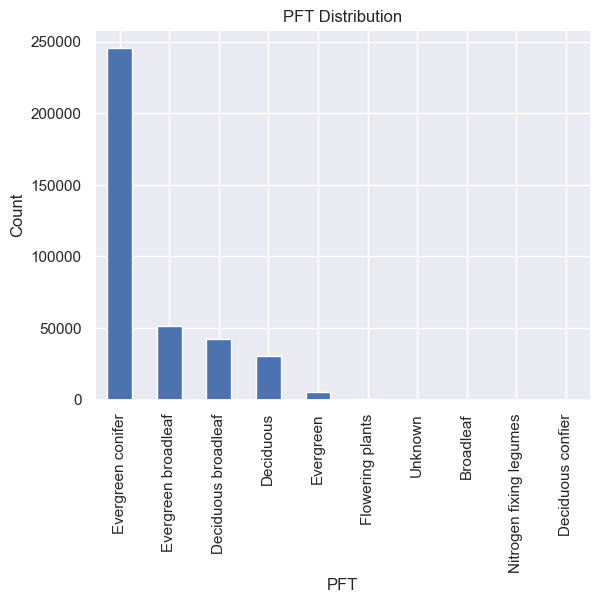

In [13]:
# remove all outliers from dia and ht using IQR
Q1 = df_fia_ckpt1['DIA'].quantile(0.25)
Q3 = df_fia_ckpt1['DIA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_fia_ckpt1 = df_fia_ckpt1[(df_fia_ckpt1['DIA'] >= lower_bound) & (df_fia_ckpt1['DIA'] <= upper_bound)]
Q1 = df_fia_ckpt1['HT'].quantile(0.25)
Q3 = df_fia_ckpt1['HT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_fia_ckpt1 = df_fia_ckpt1[(df_fia_ckpt1['HT'] >= lower_bound) & (df_fia_ckpt1['HT'] <= upper_bound)]
df_fia_ckpt1 = df_fia_ckpt1.dropna(axis=0)
df_fia_ckpt1.isna().sum()
df_fia_ckpt1['PFT'].value_counts()
df_fia_ckpt1['PFT'].value_counts().plot(kind='bar')
plt.title('PFT Distribution')
plt.xlabel('PFT')
plt.ylabel('Count')
plt.show()


In [14]:
df_fia_ckpt1

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD
0,3.9,43.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
1,24.1,95.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0
2,14.2,56.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
3,10.5,52.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
4,2.5,41.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...
427514,1.4,13.0,33.367814,-116.907126,M262Bo,Evergreen conifer,-,-,X,-,-,109.0
427515,4.3,18.0,33.367814,-116.907126,M262Bo,Evergreen conifer,-,-,X,-,-,109.0
427516,13.0,21.0,33.059000,-116.596330,M262Bo,Evergreen broadleaf,-,-,X,-,-,801.0
427517,5.1,20.0,33.059000,-116.596330,M262Bo,Evergreen broadleaf,-,-,X,-,-,801.0


In [15]:
df_fia_ckpt1.isna().sum()

DIA         0
HT          0
LAT         0
LON         0
ECOSUBCD    0
PFT         0
OCC.NC      0
OCC.NE      0
OCC.PNW     0
OCC.RM      0
OCC.SO      0
SPCD        0
dtype: int64

In [16]:
df_fia_ckpt2 = df_fia_ckpt1.dropna(axis=0).copy()
df_fia_ckpt2.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD
0,3.9,43.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
1,24.1,95.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0
2,14.2,56.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
3,10.5,52.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0
4,2.5,41.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0


In [17]:
print(df_fia_ckpt2.shape)

(375747, 12)


In [18]:
# Converting from inches to cm
df_fia_ckpt2['DIA_cm'] = df_fia_ckpt2['DIA'] * 2.54
df_fia_ckpt2.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,3.9,43.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0,9.906
1,24.1,95.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0,61.214
2,14.2,56.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0,36.068
3,10.5,52.0,41.478172,-123.946777,263Ab,Deciduous,-,-,X,-,-,631.0,26.670
4,2.5,41.0,41.478172,-123.946777,263Ab,Evergreen conifer,X,X,X,X,X,202.0,6.350


In [19]:
df_fia_ckpt2.isna().sum()

DIA         0
HT          0
LAT         0
LON         0
ECOSUBCD    0
PFT         0
OCC.NC      0
OCC.NE      0
OCC.PNW     0
OCC.RM      0
OCC.SO      0
SPCD        0
DIA_cm      0
dtype: int64

In [20]:
# Create a dictionary mapping SPCD to COMMON_NAME
fia_ref_species_table = pd.read_csv('./FIA/REF_SPECIES.csv')
spcd_to_common_name = dict(zip(fia_ref_species_table['SPCD'], fia_ref_species_table['COMMON_NAME']))

In [21]:
# Define the ECOSUBCDs to keep
ecosubcd_keep = ['M261Ep', '261Ba', 'M261Em', '263Am', 'M261Ej']

# Filter the DataFrame
df_fia_ckpt2_filtered = df_fia_ckpt2[df_fia_ckpt2['ECOSUBCD'].isin(ecosubcd_keep)]
df_fia_ckpt2_filtered.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
26897,19.1,55.0,38.72139,-120.229721,M261Em,Evergreen conifer,-,-,X,X,-,81.0,48.514
26898,18.5,64.0,38.72139,-120.229721,M261Em,Evergreen conifer,X,-,X,X,X,122.0,46.990
26899,4.1,10.0,38.72139,-120.229721,M261Em,Evergreen conifer,-,-,X,X,-,81.0,10.414
26900,11.8,34.0,38.72139,-120.229721,M261Em,Deciduous broadleaf,-,-,X,-,-,818.0,29.972
26901,14.7,43.0,38.72139,-120.229721,M261Em,Evergreen conifer,-,-,X,X,-,81.0,37.338


In [22]:
# Shuffle the filtered DataFrame
df_fia_ckpt2_filtered_shuffled = df_fia_ckpt2_filtered.sample(frac=1, random_state=42).reset_index(drop=True)
df_fia_ckpt2_filtered_shuffled.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,14.7,73.0,38.325957,-122.355485,263Am,Evergreen,-,-,X,-,-,981.0,37.338
1,13.6,49.0,37.495403,-119.671569,M261Ep,Deciduous broadleaf,-,-,X,-,-,818.0,34.544
2,27.8,120.0,36.106782,-118.646091,M261Ep,Evergreen conifer,X,-,X,X,X,15.0,70.612
3,8.2,34.0,36.795033,-119.039445,M261Ep,Evergreen conifer,X,-,X,X,X,122.0,20.828
4,1.5,10.0,38.153364,-120.059054,M261Em,Evergreen conifer,X,-,X,X,X,15.0,3.810


In [23]:
tls_treelist_df = pd.read_csv("./TLS/TLS_treelist.csv")
df_plot_identification = pd.read_csv("./TLS/blk_plot_identification.csv")
df_tls_data = tls_treelist_df.merge(df_plot_identification,on="plot_blk", how="left")
df_tls_data.head()

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,plot_num,inventory_date,inventory_hour,plot_coord_x,plot_coord_y,plot_coord_srs,plot_declination,inventory_plot_diam,plot_slopeper,plot_aspectdegre
0,0,1,10.673382,2.127033,0.266540,0.001199,12.560,1.3,20.987379,2.402324,...,101.0,8/2/24,9:20,298018.0,4108419.0,26911.0,12.28°E,11.3,25.0,89.0
1,3,6,2.429448,1.055521,0.166444,0.000730,8.742,1.3,13.105771,0.936786,...,101.0,8/2/24,9:20,298018.0,4108419.0,26911.0,12.28°E,11.3,25.0,89.0
2,4,8,2.149436,0.950025,0.759981,0.001151,13.469,1.3,59.840890,19.530404,...,101.0,8/2/24,9:20,298018.0,4108419.0,26911.0,12.28°E,11.3,25.0,89.0
3,5,9,1.962382,8.781092,0.267219,0.001217,18.144,1.3,21.040854,2.414582,...,101.0,8/2/24,9:20,298018.0,4108419.0,26911.0,12.28°E,11.3,25.0,89.0
4,6,12,1.433234,0.234223,0.208154,0.000543,13.790,1.3,16.390056,1.465130,...,101.0,8/2/24,9:20,298018.0,4108419.0,26911.0,12.28°E,11.3,25.0,89.0


In [24]:
df_tls_data['site_name_label'].value_counts()

site_name_label
Calaveras Big Trees State Park    408
Independence Lake (IND)           229
Shaver Lake (SHA)                 209
Winton-Schaads VMP (WIN)          176
Pacific Union College (PUC)       176
Sedgwick Reserve (SDR)             88
Name: count, dtype: int64

In [25]:
df_tls_data.shape

(1382, 29)

In [26]:
df_fia_ckpt2_filtered_shuffled.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,14.7,73.0,38.325957,-122.355485,263Am,Evergreen,-,-,X,-,-,981.0,37.338
1,13.6,49.0,37.495403,-119.671569,M261Ep,Deciduous broadleaf,-,-,X,-,-,818.0,34.544
2,27.8,120.0,36.106782,-118.646091,M261Ep,Evergreen conifer,X,-,X,X,X,15.0,70.612
3,8.2,34.0,36.795033,-119.039445,M261Ep,Evergreen conifer,X,-,X,X,X,122.0,20.828
4,1.5,10.0,38.153364,-120.059054,M261Em,Evergreen conifer,X,-,X,X,X,15.0,3.810


In [27]:
"""df_encoded = pd.get_dummies(df_fia_ckpt2_filtered_shuffled, columns=['ECOSUBCD'])
df_encoded = df_encoded.drop(['ECOSUBCD_M261Ep'], axis=1)
df_encoded.head()"""

"df_encoded = pd.get_dummies(df_fia_ckpt2_filtered_shuffled, columns=['ECOSUBCD'])\ndf_encoded = df_encoded.drop(['ECOSUBCD_M261Ep'], axis=1)\ndf_encoded.head()"

In [28]:
# Do label encoding for ECOSUBCD
label_encoder_ecosubcd = LabelEncoder()
df_encoded = df_fia_ckpt2_filtered_shuffled.copy()
df_encoded['ECOSUBCD'] = label_encoder_ecosubcd.fit_transform(df_fia_ckpt2_filtered_shuffled['ECOSUBCD'])

In [29]:
df_encoded['PFT'].value_counts()

PFT
Evergreen conifer      16263
Evergreen broadleaf     3476
Deciduous broadleaf     2768
Evergreen                424
Deciduous                 96
Flowering plants          15
Broadleaf                  2
Name: count, dtype: int64

In [30]:
replace_dict = {'Deciduous': 'Deciduous Broadleaf'} 
df_encoded['PFT'] = df_encoded['PFT'].replace(replace_dict)

In [31]:
df_encoded

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,14.7,73.0,38.325957,-122.355485,1,Evergreen,-,-,X,-,-,981.0,37.338
1,13.6,49.0,37.495403,-119.671569,4,Deciduous broadleaf,-,-,X,-,-,818.0,34.544
2,27.8,120.0,36.106782,-118.646091,4,Evergreen conifer,X,-,X,X,X,15.0,70.612
3,8.2,34.0,36.795033,-119.039445,4,Evergreen conifer,X,-,X,X,X,122.0,20.828
4,1.5,10.0,38.153364,-120.059054,3,Evergreen conifer,X,-,X,X,X,15.0,3.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,9.5,54.0,35.846198,-118.602844,4,Evergreen conifer,X,-,X,X,X,15.0,24.130
23040,16.7,98.0,36.791094,-118.966081,4,Evergreen conifer,-,-,X,X,-,117.0,42.418
23041,37.3,105.0,36.163583,-118.519390,4,Evergreen conifer,-,-,X,X,-,116.0,94.742
23042,1.2,7.0,37.096947,-119.360283,4,Evergreen conifer,-,-,X,X,-,81.0,3.048


In [32]:
# apply label encoding to 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO'

label_encoder_region = LabelEncoder()
df_encoded['OCC.NC'] = label_encoder_region.fit_transform(df_encoded['OCC.NC'])
df_encoded['OCC.NE'] = label_encoder_region.fit_transform(df_encoded['OCC.NE'])
df_encoded['OCC.PNW'] = label_encoder_region.fit_transform(df_encoded['OCC.PNW'])
df_encoded['OCC.RM'] = label_encoder_region.fit_transform(df_encoded['OCC.RM'])
df_encoded['OCC.SO'] = label_encoder_region.fit_transform(df_encoded['OCC.SO'])
df_encoded.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,14.7,73.0,38.325957,-122.355485,1,Evergreen,0,0,0,0,0,981.0,37.338
1,13.6,49.0,37.495403,-119.671569,4,Deciduous broadleaf,0,0,0,0,0,818.0,34.544
2,27.8,120.0,36.106782,-118.646091,4,Evergreen conifer,1,0,0,1,1,15.0,70.612
3,8.2,34.0,36.795033,-119.039445,4,Evergreen conifer,1,0,0,1,1,122.0,20.828
4,1.5,10.0,38.153364,-120.059054,3,Evergreen conifer,1,0,0,1,1,15.0,3.810


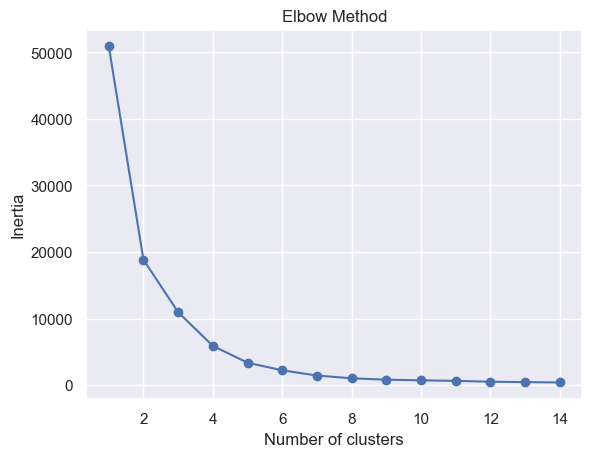

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_encoded[['LAT', 'LON']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
df_encoded['region'] = kmeans.fit_predict(df_encoded[['LAT', 'LON']])


In [35]:
# Split into training and test sets
#independent_variables = ["DIA_cm", 'CBH', 'LAT', 'LON', 'ECOSUBCD_261Ba', 'ECOSUBCD_263Am', 'ECOSUBCD_M261Ej', 'ECOSUBCD_M261Em']
independent_variables = ["DIA_cm", 'HT', 'LAT', 'LON', 'ECOSUBCD','OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO','region']
dependent_variable = "PFT"
include_variables = independent_variables + [dependent_variable]
fia_train, fia_test = train_test_split(df_encoded[include_variables].dropna(), test_size=0.2)
print(f"Training set size: {len(fia_train)}")
print(f"Test set size: {len(fia_test)}")

Training set size: 18435
Test set size: 4609


In [36]:
df_encoded["PFT"].value_counts()

PFT
Evergreen conifer      16263
Evergreen broadleaf     3476
Deciduous broadleaf     2768
Evergreen                424
Deciduous Broadleaf       96
Flowering plants          15
Broadleaf                  2
Name: count, dtype: int64

In [37]:
# replace Deciduous Broadleaf  with Deciduous broadleaf
replace_dict = {'Deciduous Broadleaf': 'Deciduous broadleaf'}
df_encoded['PFT'] = df_encoded['PFT'].replace(replace_dict)
df_encoded['PFT'] = df_encoded['PFT'].str.strip().str.lower()
# if df_encoded['PFT'] is Broadleaf, then drop it 
df_encoded = df_encoded[df_encoded['PFT'] != 'broadleaf']

In [38]:
df_encoded["PFT"].value_counts()

PFT
evergreen conifer      16263
evergreen broadleaf     3476
deciduous broadleaf     2864
evergreen                424
flowering plants          15
Name: count, dtype: int64

In [39]:
df_encoded

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm,region
0,14.7,73.0,38.325957,-122.355485,1,evergreen,0,0,0,0,0,981.0,37.338,3
1,13.6,49.0,37.495403,-119.671569,4,deciduous broadleaf,0,0,0,0,0,818.0,34.544,0
2,27.8,120.0,36.106782,-118.646091,4,evergreen conifer,1,0,0,1,1,15.0,70.612,1
3,8.2,34.0,36.795033,-119.039445,4,evergreen conifer,1,0,0,1,1,122.0,20.828,4
4,1.5,10.0,38.153364,-120.059054,3,evergreen conifer,1,0,0,1,1,15.0,3.810,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,9.5,54.0,35.846198,-118.602844,4,evergreen conifer,1,0,0,1,1,15.0,24.130,1
23040,16.7,98.0,36.791094,-118.966081,4,evergreen conifer,0,0,0,1,0,117.0,42.418,4
23041,37.3,105.0,36.163583,-118.519390,4,evergreen conifer,0,0,0,1,0,116.0,94.742,1
23042,1.2,7.0,37.096947,-119.360283,4,evergreen conifer,0,0,0,1,0,81.0,3.048,4


In [40]:
df_encoded['size_class'] = pd.cut(df_encoded['DIA'], bins=[0, 10, 30, 60, 200], labels=['Sapling', 'Pole', 'Mature', 'Ancient'])

/var/folders/r_/3zpp4z8x0jsdx29mzsxh1c_80000gn/T/ipykernel_27799/1610540570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['size_class'] = pd.cut(df_encoded['DIA'], bins=[0, 10, 30, 60, 200], labels=['Sapling', 'Pole', 'Mature', 'Ancient'])


In [41]:
# Apply label encoding to 'size_class'
label_encoder_size = LabelEncoder()
df_encoded['size_class'] = label_encoder_size.fit_transform(df_encoded['size_class'])

/var/folders/r_/3zpp4z8x0jsdx29mzsxh1c_80000gn/T/ipykernel_27799/648220787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['size_class'] = label_encoder_size.fit_transform(df_encoded['size_class'])


In [42]:
df_encoded

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm,region,size_class
0,14.7,73.0,38.325957,-122.355485,1,evergreen,0,0,0,0,0,981.0,37.338,3,1
1,13.6,49.0,37.495403,-119.671569,4,deciduous broadleaf,0,0,0,0,0,818.0,34.544,0,1
2,27.8,120.0,36.106782,-118.646091,4,evergreen conifer,1,0,0,1,1,15.0,70.612,1,1
3,8.2,34.0,36.795033,-119.039445,4,evergreen conifer,1,0,0,1,1,122.0,20.828,4,2
4,1.5,10.0,38.153364,-120.059054,3,evergreen conifer,1,0,0,1,1,15.0,3.810,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,9.5,54.0,35.846198,-118.602844,4,evergreen conifer,1,0,0,1,1,15.0,24.130,1,2
23040,16.7,98.0,36.791094,-118.966081,4,evergreen conifer,0,0,0,1,0,117.0,42.418,4,1
23041,37.3,105.0,36.163583,-118.519390,4,evergreen conifer,0,0,0,1,0,116.0,94.742,1,0
23042,1.2,7.0,37.096947,-119.360283,4,evergreen conifer,0,0,0,1,0,81.0,3.048,4,2


In [43]:
independent_variables = ["DIA", 'HT', 'LAT', 'LON', 'ECOSUBCD','OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO','region','size_class']

In [44]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_encoded[independent_variables]
y = df_encoded['PFT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/ironman/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [45]:
df_encoded.to_csv("./FIA/df_encoded.csv", index=False)

In [46]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis


# Import necessary libraries

# Define classifiers
bagging_clf = BaggingClassifier()
extra_trees_clf = ExtraTreesClassifier()
random_forest_clf = RandomForestClassifier(max_depth=10)
decision_tree_clf = DecisionTreeClassifier()
extra_tree_clf = ExtraTreeClassifier()
knn_clf = KNeighborsClassifier()
qda_clf = QuadraticDiscriminantAnalysis()
lda_clf = LinearDiscriminantAnalysis()

In [47]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 
from xgboost import XGBClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the base models
base_models = [
    ('bagging', BaggingClassifier()),
    ('extra_trees', ExtraTreesClassifier()),
    ('random_forest', RandomForestClassifier(max_depth=10)),
    ('decision_tree', DecisionTreeClassifier()),
    ('extra_tree', ExtraTreeClassifier())
]

# Define the meta-model using XGBoost
meta_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create the stacked classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked classifier
stacked_clf.fit(X_train, y_train)

# Evaluate the stacked classifier
stacked_accuracy = stacked_clf.score(X_test, y_test)
print(f"Stacked Classifier Accuracy (XGBoost Meta): {stacked_accuracy:.2f}")


Stacked Classifier Accuracy (XGBoost Meta): 0.97


In [48]:
# Evaluate the stacked classifier on the test set
predictions = stacked_clf.predict(X_test)
# Print the classification report
print(classification_report(y_test, predictions, zero_division=0))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_pft, yticklabels=unique_pft)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# Feature importance
importances = stacked_clf.named_estimators_['random_forest'].feature_importances_
feature_names = independent_variables
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


                     precision    recall  f1-score   support

deciduous broadleaf       0.87      0.89      0.88       539
          evergreen       0.76      0.84      0.80        99
evergreen broadleaf       0.91      0.89      0.90       685
  evergreen conifer       1.00      1.00      1.00      3281
   flowering plants       1.00      0.40      0.57         5

           accuracy                           0.97      4609
          macro avg       0.91      0.80      0.83      4609
       weighted avg       0.97      0.97      0.97      4609



NameError: name 'unique_pft' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
X

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class
0,14.70,73.00,38.33,-122.36,1,0,0,0,0,0,2,1
1,13.60,49.00,37.50,-119.67,4,0,0,0,0,0,4,1
2,27.80,120.00,36.11,-118.65,4,1,0,0,1,1,0,1
3,8.20,34.00,36.80,-119.04,4,1,0,0,1,1,5,2
4,1.50,10.00,38.15,-120.06,3,1,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23039,9.50,54.00,35.85,-118.60,4,1,0,0,1,1,0,2
23040,16.70,98.00,36.79,-118.97,4,0,0,0,1,0,5,1
23041,37.30,105.00,36.16,-118.52,4,0,0,0,1,0,0,0
23042,1.20,7.00,37.10,-119.36,4,0,0,0,1,0,5,2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_train.value_counts()

PFT
evergreen conifer      12982
evergreen broadleaf     2791
deciduous broadleaf     2325
evergreen                325
flowering plants          10
Name: count, dtype: int64

# Do Not Run below , unless tuning 

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import randint, uniform

# --- Label Encode ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# --- Tune Base Models ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Increased from 3 to 5 folds

# Random Forest - Expanded parameter space
rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20,  # Increased from 10 to 20
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train_encoded)

# Extra Trees - Expanded parameter space
et_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

et_search = RandomizedSearchCV(
    ExtraTreesClassifier(class_weight='balanced', random_state=42),
    param_distributions=et_param_dist,
    n_iter=20,  # Increased from 10 to 20
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
et_search.fit(X_train, y_train_encoded)

# Decision Tree - Expanded parameter space
dt_param_dist = {
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_distributions=dt_param_dist,
    n_iter=15,  # Increased from 5 to 15
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
dt_search.fit(X_train, y_train_encoded)

# Bagging - Now with parameter tuning
# Using 'estimator' instead of 'base_estimator' for newer scikit-learn versions
bagging_param_dist = {
    'n_estimators': randint(10, 100),
    'max_samples': uniform(0.5, 0.5),  # 0.5 to 1.0
    'max_features': uniform(0.5, 0.5),  # 0.5 to 1.0
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create a base tree classifier to use as the estimator
base_dt = DecisionTreeClassifier(random_state=42)

# Initialize BaggingClassifier with the estimator
bagging_clf = BaggingClassifier(random_state=42)
# Set the estimator separately to handle compatibility with different sklearn versions
try:
    # For newer versions (1.0+)
    bagging_clf.estimator = base_dt
except AttributeError:
    # For older versions
    bagging_clf.base_estimator = base_dt

bagging_search = RandomizedSearchCV(
    bagging_clf,
    param_distributions=bagging_param_dist,
    n_iter=15,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
bagging_search.fit(X_train, y_train_encoded)

# --- Define Base Models (Tuned) ---
base_models = [
    ('extra_trees', et_search.best_estimator_),
    ('random_forest', rf_search.best_estimator_),
    ('bagging', bagging_search.best_estimator_),
    ('decision_tree', dt_search.best_estimator_)
]

# --- Define and Tune Meta-Learner (XGBoost) ---
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    random_state=42
)

# Expanded XGBoost parameter space
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.29),  # 0.01 to 0.3
    'subsample': uniform(0.5, 0.5),  # 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # 0.5 to 1.0
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Remove parameters that might not be compatible with your XGBoost version
# Uncomment the following lines if you want to use them and your version supports them
# xgb_param_dist['colsample_bylevel'] = uniform(0.5, 0.5)
# xgb_param_dist['colsample_bynode'] = uniform(0.5, 0.5)
# xgb_param_dist['scale_pos_weight'] = [1, 'balanced']

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=50,  # Increased from 30 to 50
    scoring='f1_weighted',
    cv=5,  # Increased from 3 to 5
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# --- Build Stacking Classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=xgb_search,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    stack_method='predict_proba'
)

# --- Train ---
stacked_clf.fit(X_train, y_train_encoded)

# --- Evaluate ---
y_pred = stacked_clf.predict(X_test)
print("\n📊 Classification Report (Tuned Base Models + Tuned XGBoost Meta):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# --- Show best params ---
print("\n🔍 Best Meta-Learner Params:\n", stacked_clf.final_estimator_.best_params_)
print("\n✅ Best Base Model Params:")
print("Random Forest:", rf_search.best_params_)
print("Extra Trees:", et_search.best_params_)
print("Decision Tree:", dt_search.best_params_)
print("Bagging:", bagging_search.best_params_)"""

'from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold\nfrom sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.ensemble import StackingClassifier\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.metrics import classification_report\nimport numpy as np\nfrom scipy.stats import randint, uniform\n\n# --- Label Encode ---\ny_train = y_train.str.strip().str.lower()\ny_test = y_test.str.strip().str.lower()\nlabel_encoder = LabelEncoder()\ny_train_encoded = label_encoder.fit_transform(y_train)\ny_test_encoded = label_encoder.transform(y_test)\n\n# --- Tune Base Models ---\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Increased from 3 to 5 folds\n\n# Random Forest - Expanded parameter space\nrf_param_dist = {\n    \'n_estimators\': randint(100, 500),\n    \'max_depth\': randint(10, 30),\n    \'min_samples_sp

🔍 Best Meta-Learner Params:
 {'colsample_bytree': 0.8861223846483287, 'gamma': 0.993578407670862, 'learning_rate': 0.011601413965844696, 'max_depth': 13, 'min_child_weight': 3, 'n_estimators': 180, 'reg_alpha': 0.71134195274865, 'reg_lambda': 0.7901755405312056, 'subsample': 0.8029799873905057}

✅ Best Base Model Params:
Random Forest: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 23, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 317}
Extra Trees: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 23, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 317}
Decision Tree: {'criterion': 'gini', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'splitter': 'best'}
Bagging: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.9868777594207296, 'max_samples': 0.6163856702151521, 'n_estimators': 71}

# Final Model 

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Label Encode ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()

label_encoder_pft = LabelEncoder()
y_train_encoded = label_encoder_pft.fit_transform(y_train)
y_test_encoded = label_encoder_pft.transform(y_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Best Base Models ---

rf = RandomForestClassifier(
    n_estimators=317,
    max_depth=23,
    min_samples_split=6,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    criterion='log_loss',
    class_weight='balanced',
    random_state=42
)

et = ExtraTreesClassifier(
    n_estimators=317,
    max_depth=23,
    min_samples_split=6,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    criterion='log_loss',
    random_state=42
)

dt = DecisionTreeClassifier(
    max_depth=14,
    min_samples_split=13,
    min_samples_leaf=3,
    max_features=None,
    criterion='gini',
    splitter='best',
    random_state=42
)

bagging = BaggingClassifier(
    n_estimators=71,
    max_samples=0.616,
    max_features=0.987,
    bootstrap=False,
    bootstrap_features=False,
    random_state=42
)

# --- Meta-Learner ---
meta_learner = XGBClassifier(
    n_estimators=180,
    max_depth=13,
    learning_rate=0.0116,
    subsample=0.803,
    colsample_bytree=0.886,
    gamma=0.994,
    reg_alpha=0.711,
    reg_lambda=0.790,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# --- Stacking Ensemble ---
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf),
     #  ('et', et),
        ('dt', dt),
        ('bagging', bagging)
    ],
    final_estimator=meta_learner,
    cv=cv,
    n_jobs=-1,
    passthrough=True
)

# --- Train ---
stacking_model.fit(X_train, y_train_encoded)

# --- Evaluate ---
y_pred = stacking_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder_pft.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


Classification Report:
                     precision    recall  f1-score   support

deciduous broadleaf       0.88      0.89      0.89       539
          evergreen       0.75      0.84      0.79        99
evergreen broadleaf       0.92      0.90      0.91       685
  evergreen conifer       1.00      1.00      1.00      3281
   flowering plants       1.00      0.40      0.57         5

           accuracy                           0.97      4609
          macro avg       0.91      0.81      0.83      4609
       weighted avg       0.97      0.97      0.97      4609

Confusion Matrix:
[[ 481   10   44    4    0]
 [   7   83    8    1    0]
 [  55   15  614    1    0]
 [   3    1    1 3276    0]
 [   2    1    0    0    2]]


In [110]:
stacking_model

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       criterion='log_loss',
                                                       max_depth=23,
                                                       max_features=None,
                                                       min_samples_split=6,
                                                       n_estimators=317,
                                                       random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=14,
                                                       min_samples_leaf=3,
                                                       min_samples_split=13,
                                                       random_state=42))...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.0116,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=13, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=180, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...),
                   n_jobs=-1, passthrough=True)

In [111]:
X_train.columns

Index(['DIA', 'HT', 'LAT', 'LON', 'ECOSUBCD', 'OCC.NC', 'OCC.NE', 'OCC.PNW',
       'OCC.RM', 'OCC.SO', 'region', 'size_class'],
      dtype='object')

In [112]:
X_train

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class
450,13.40,71.00,37.00,-119.11,4,1,0,0,1,1,4,1
14535,8.50,30.00,36.01,-118.52,4,0,0,0,0,0,1,2
2066,9.40,32.00,36.95,-119.23,4,0,0,0,0,0,4,2
17687,24.20,104.00,38.65,-120.37,3,1,0,0,1,1,5,1
1071,8.50,40.00,38.05,-120.15,3,0,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14.00,56.00,38.59,-122.42,1,0,0,0,0,0,3,1
21576,30.10,113.00,38.42,-120.50,3,1,0,0,1,1,5,0
5390,1.50,20.00,38.50,-120.17,3,0,0,0,0,0,5,2
860,25.20,70.00,39.36,-120.10,2,0,0,0,1,0,2,1


In [113]:
df_tls_data.columns

Index(['Unnamed: 0_x', 'TreeID', 'X', 'Y', 'Radius', 'Error', 'H', 'h_radius',
       'DBH', 'BasalA', 'plot_blk', 'Unnamed: 0_y', 'inventory_id',
       'site_project', 'site_project_label', 'site_name', 'site_name_label',
       'inventory_pre_post_fire', 'inventory_pre_post_fire_label', 'plot_num',
       'inventory_date', 'inventory_hour', 'plot_coord_x', 'plot_coord_y',
       'plot_coord_srs', 'plot_declination', 'inventory_plot_diam',
       'plot_slopeper', 'plot_aspectdegre', 'lon', 'lat', 'OCC.NC', 'OCC.NE',
       'OCC.PNW', 'OCC.RM', 'OCC.SO', 'ECOSUBCD', 'region', 'size_class'],
      dtype='object')

In [114]:
df_tls_data[['X', 'Y', 'plot_coord_x', 'plot_coord_y', 'plot_coord_srs']].head()

,X,Y,plot_coord_x,plot_coord_y,plot_coord_srs
0,10.67,2.13,298018.00,4108419.00,26911.00
1,2.43,1.06,298018.00,4108419.00,26911.00
2,2.15,0.95,298018.00,4108419.00,26911.00
3,1.96,8.78,298018.00,4108419.00,26911.00
4,1.43,0.23,298018.00,4108419.00,26911.00


In [115]:
pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [116]:
from pyproj import Transformer
import pandas as pd

# Assuming your df is already loaded

# Create transformer from UTM Zone 11N (EPSG:26911) to WGS84 Lat/Lon (EPSG:4326)
transformer = Transformer.from_crs("EPSG:26911", "EPSG:4326", always_xy=True)

# Apply transformation to each row
df_tls_data[['lon', 'lat']] = df_tls_data.apply(lambda row: pd.Series(transformer.transform(row['plot_coord_x'], row['plot_coord_y'])),
                              axis=1)

print(df_tls_data[['plot_coord_x', 'plot_coord_y', 'lon', 'lat']].head())


   plot_coord_x  plot_coord_y     lon   lat
0     298018.00    4108419.00 -119.27 37.10
1     298018.00    4108419.00 -119.27 37.10
2     298018.00    4108419.00 -119.27 37.10
3     298018.00    4108419.00 -119.27 37.10
4     298018.00    4108419.00 -119.27 37.10


In [117]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,region,size_class
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Mature
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole


In [118]:
def get_region_flags(lat, lon):
    return pd.Series({
        'OCC.NC': int(38 <= lat <= 42 and -124 <= lon <= -120),
        'OCC.NE': int(42 < lat <= 49 and -120 < lon <= -104),  # Assuming NE means inland north
        'OCC.PNW': int(42 < lat <= 49 and -125 <= lon <= -116),
        'OCC.RM': int(37 <= lat <= 49 and -116 < lon <= -104),
        'OCC.SO': int(32 <= lat < 38 and -124 <= lon <= -114),
    })

# Apply to your dataframe
df_tls_data[['OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']] = df_tls_data.apply(
    lambda row: get_region_flags(row['lat'], row['lon']),
    axis=1
)

print(df_tls_data[['lat', 'lon', 'OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']].head())


    lat     lon  OCC.NC  OCC.NE  OCC.PNW  OCC.RM  OCC.SO
0 37.10 -119.27       0       0        0       0       1
1 37.10 -119.27       0       0        0       0       1
2 37.10 -119.27       0       0        0       0       1
3 37.10 -119.27       0       0        0       0       1
4 37.10 -119.27       0       0        0       0       1


In [119]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,region,size_class
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Mature
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole


In [120]:
df_tls_data["site_name_label"].value_counts()

site_name_label
Calaveras Big Trees State Park    408
Independence Lake (IND)           229
Shaver Lake (SHA)                 209
Winton-Schaads VMP (WIN)          176
Pacific Union College (PUC)       176
Sedgwick Reserve (SDR)             88
Name: count, dtype: int64

In [121]:
# Define your mapping
site_to_ecosubcd = {
    "Shaver Lake (SHA)": "M261Ep",
    "Sedgwick Reserve (SDR)": "261Ba",
    "Calaveras Big Trees State Park": "M261Em",
    "Pacific Union College (PUC)": "263Am",
    "Independence Lake (IND)": "M261Ej",
    "Winton-Schaads VMP (WIN)" :"M261Em",
}

# Create new column
df_tls_data['ECOSUBCD'] = df_tls_data['site_name_label'].map(site_to_ecosubcd)

print(df_tls_data[['site_name_label', 'ECOSUBCD']].head())


     site_name_label ECOSUBCD
0  Shaver Lake (SHA)   M261Ep
1  Shaver Lake (SHA)   M261Ep
2  Shaver Lake (SHA)   M261Ep
3  Shaver Lake (SHA)   M261Ep
4  Shaver Lake (SHA)   M261Ep


In [122]:
df_tls_data["ECOSUBCD"].value_counts()

ECOSUBCD
M261Em    584
M261Ej    229
M261Ep    209
263Am     176
261Ba      88
Name: count, dtype: int64

In [123]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,region,size_class
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Mature
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole


In [124]:
df_tls_data.dropna(inplace=True)

In [125]:
df_tls_data['region'] = kmeans.fit_predict(df_tls_data[['lat', 'lon']])

In [126]:
df_tls_data['size_class'] = pd.cut(df_tls_data['DBH'], bins=[0, 10, 30, 60, 200], labels=['Sapling', 'Pole', 'Mature', 'Ancient'])

In [127]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,region,size_class
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Mature
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole


In [128]:
TLS_X = df_tls_data[['DBH', 'H', 'lat', 'lon', 'ECOSUBCD', 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO','region','size_class']]

In [129]:
# match the feautre names 
TLS_X.columns = ['DIA', 'HT', 'LAT', 'LON', 'ECOSUBCD', 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO','region','size_class']

In [130]:
len(TLS_X)

1285

In [131]:
# Apply label encoding to 'ECOSUBCD'
label_encoder = LabelEncoder()
TLS_X['ECOSUBCD'] = label_encoder.fit_transform(TLS_X['ECOSUBCD'])
# Apply label encoding to 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO'
TLS_X['OCC.NC'] = label_encoder.fit_transform(TLS_X['OCC.NC'])
TLS_X['OCC.NE'] = label_encoder.fit_transform(TLS_X['OCC.NE'])
TLS_X['OCC.PNW'] = label_encoder.fit_transform(TLS_X['OCC.PNW'])
TLS_X['OCC.RM'] = label_encoder.fit_transform(TLS_X['OCC.RM'])
TLS_X['OCC.SO'] = label_encoder.fit_transform(TLS_X['OCC.SO'])

In [132]:
#TLS_X.dropna(inplace=True)

In [133]:
y

0                  evergreen
1        deciduous broadleaf
2          evergreen conifer
3          evergreen conifer
4          evergreen conifer
                ...         
23039      evergreen conifer
23040      evergreen conifer
23041      evergreen conifer
23042      evergreen conifer
23043      evergreen conifer
Name: PFT, Length: 23042, dtype: object

In [134]:
y_train_encoded

array([3, 2, 2, ..., 2, 3, 3])

In [135]:
# apply label_encoder_pft to just y var
y = label_encoder_pft.transform(y)

In [136]:
# Train on entire dataset
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.886, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.994, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0116, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=13,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [137]:
TLS_X.isna().sum()

DIA           0
HT            0
LAT           0
LON           0
ECOSUBCD      0
OCC.NC        0
OCC.NE        0
OCC.PNW       0
OCC.RM        0
OCC.SO        0
region        0
size_class    0
dtype: int64

In [138]:
TLS_X.dropna(inplace=True)

In [139]:
TLS_X[TLS_X.isna().any(axis=1)]

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class


In [140]:
TLS_X

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class
0,20.99,12.56,37.10,-119.27,4,0,0,0,0,1,1,Pole
1,13.11,8.74,37.10,-119.27,4,0,0,0,0,1,1,Pole
2,59.84,13.47,37.10,-119.27,4,0,0,0,0,1,1,Mature
3,21.04,18.14,37.10,-119.27,4,0,0,0,0,1,1,Pole
4,16.39,13.79,37.10,-119.27,4,0,0,0,0,1,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17.32,30.63,38.25,-114.22,3,0,0,0,1,0,4,Pole
1378,24.25,23.08,38.25,-114.22,3,0,0,0,1,0,4,Pole
1379,17.84,30.13,38.25,-114.22,3,0,0,0,1,0,4,Pole
1380,14.21,29.30,38.25,-114.22,3,0,0,0,1,0,4,Pole


In [141]:
# apply label encoding to 'size_class'  
TLS_X['size_class'] = label_encoder_size.fit_transform(TLS_X['size_class'])

In [142]:
# predict PFT using the stacked model on TLS_X
predicted_pft_tls = stacking_model.predict(TLS_X)
predicted_pft_tls

array([0, 0, 0, ..., 3, 3, 3])

In [143]:
# If you want to get the original labels back
predicted_pft_tls_labels = label_encoder_pft.inverse_transform(predicted_pft_tls)
predicted_pft_tls_labels

array(['deciduous broadleaf', 'deciduous broadleaf',
       'deciduous broadleaf', ..., 'evergreen conifer',
       'evergreen conifer', 'evergreen conifer'], dtype=object)

In [144]:
len(predicted_pft_tls)

1285

In [145]:
# find value counts of predicted_pft_tls
predicted_pft_tls_labels_df = pd.Series(predicted_pft_tls).value_counts()
predicted_pft_tls_labels_df
# decode the labels

3    811
2    258
0    215
1      1
Name: count, dtype: int64

In [146]:
predicted_pft_tls_labels_df

3    811
2    258
0    215
1      1
Name: count, dtype: int64

In [147]:
# Find percentage of each PFT
predicted_pft_tls_labels_df_percentage = predicted_pft_tls_labels_df / predicted_pft_tls_labels_df.sum() * 100
predicted_pft_tls_labels_df_percentage

3   63.11
2   20.08
0   16.73
1    0.08
Name: count, dtype: float64

In [148]:
predicted_pft_tls_labels_df

3    811
2    258
0    215
1      1
Name: count, dtype: int64

In [149]:
# join X and y in a seperate dataframe
df_X_y = pd.DataFrame(TLS_X)
df_X_y['PFT'] = predicted_pft_tls

In [150]:
df_X_y

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class,PFT
0,20.99,12.56,37.10,-119.27,4,0,0,0,0,1,1,2,0
1,13.11,8.74,37.10,-119.27,4,0,0,0,0,1,1,2,0
2,59.84,13.47,37.10,-119.27,4,0,0,0,0,1,1,1,0
3,21.04,18.14,37.10,-119.27,4,0,0,0,0,1,1,2,0
4,16.39,13.79,37.10,-119.27,4,0,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17.32,30.63,38.25,-114.22,3,0,0,0,1,0,4,2,3
1378,24.25,23.08,38.25,-114.22,3,0,0,0,1,0,4,2,3
1379,17.84,30.13,38.25,-114.22,3,0,0,0,1,0,4,2,3
1380,14.21,29.30,38.25,-114.22,3,0,0,0,1,0,4,2,3


In [151]:
# Decode the labels of ECOSUBCD 
df_X_y['ECOSUBCD'] = label_encoder_ecosubcd.inverse_transform(df_X_y['ECOSUBCD'])

In [152]:
df_X_y

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,region,size_class,PFT
0,20.99,12.56,37.10,-119.27,M261Ep,0,0,0,0,1,1,2,0
1,13.11,8.74,37.10,-119.27,M261Ep,0,0,0,0,1,1,2,0
2,59.84,13.47,37.10,-119.27,M261Ep,0,0,0,0,1,1,1,0
3,21.04,18.14,37.10,-119.27,M261Ep,0,0,0,0,1,1,2,0
4,16.39,13.79,37.10,-119.27,M261Ep,0,0,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17.32,30.63,38.25,-114.22,M261Em,0,0,0,1,0,4,2,3
1378,24.25,23.08,38.25,-114.22,M261Em,0,0,0,1,0,4,2,3
1379,17.84,30.13,38.25,-114.22,M261Em,0,0,0,1,0,4,2,3
1380,14.21,29.30,38.25,-114.22,M261Em,0,0,0,1,0,4,2,3


In [153]:
df_X_y.groupby('ECOSUBCD')['PFT'].value_counts(normalize=True)

ECOSUBCD  PFT
261Ba     2     1.00
263Am     2     0.97
          0     0.03
          1     0.01
M261Ej    3     1.00
M261Em    3     1.00
          0     0.00
M261Ep    0     1.00
Name: proportion, dtype: float64

In [154]:
# Reverse the site_to_ecosubcd dictionary
ecosubcd_to_site = {v: k for k, v in site_to_ecosubcd.items()}

# Decode the ECOSUBCD column and map it to the site names
df_X_y['site_name_decoded'] = df_X_y['ECOSUBCD'].map(ecosubcd_to_site)

# Display the updated DataFrame
df_X_y[['ECOSUBCD', 'site_name_decoded']].head()

,ECOSUBCD,site_name_decoded
0,M261Ep,Shaver Lake (SHA)
1,M261Ep,Shaver Lake (SHA)
2,M261Ep,Shaver Lake (SHA)
3,M261Ep,Shaver Lake (SHA)
4,M261Ep,Shaver Lake (SHA)


In [155]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,region,size_class
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Mature
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,-119.27,37.10,0,0,0,0,1,M261Ep,1,Pole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,-114.22,38.25,0,0,0,1,0,M261Em,4,Pole


In [156]:
field_tree = pd.read_csv("Field/03_tree.csv")
field_plot = pd.read_csv("Field/01_plot_identification.csv")

In [157]:
field_data = field_tree.merge(field_plot, on="inventory_id", how="left")
field_data

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,groundpost_cover_total,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label
0,143_pre_SHA_burn3d,1,204,ABCO,Abies concolor,NaN,Live,Live,8.20,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
1,143_pre_SHA_burn3d,2,205,ABCO,Abies concolor,NaN,Live,Live,54.60,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
2,143_pre_SHA_burn3d,3,206,ABCO,Abies concolor,NaN,Live,Live,86.90,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
3,143_pre_SHA_burn3d,4,207,ABCO,Abies concolor,NaN,Live,Live,21.70,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
4,143_pre_SHA_burn3d,5,208,ABCO,Abies concolor,NaN,Live,Live,45.30,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,46_pre_puc_burn3d,11,1155,NODE,Notholicarpos densiflorus,NaN,Live,Live,35.60,NaN,...,100,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail
2143,46_pre_puc_burn3d,12,1156,NODE,Notholicarpos densiflorus,NaN,Live,Live,43.70,NaN,...,100,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail
2144,46_pre_puc_burn3d,13,1157,PSME,Pseudotsuga menziesii,NaN,Live,Live,71.40,NaN,...,100,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail
2145,46_pre_puc_burn3d,14,1158,ARBMEN,Arbutus menziesii,NaN,Live,Live,31.90,NaN,...,100,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail


In [ ]:
# Filter rows with specific site_name_label values
filtered_site_names = [
    "Shaver Lake (SHA)",
    "Sedgwick Reserve (SDR)",
    "Calaveras Big Trees State Park",
    "Pacific Union College (PUC)",
    "Independence Lake (IND)",
    "Winton-Schaads VMP (WIN)"
] 
field_plot_filtered = field_data[field_data['site_name_label'].isin(filtered_site_names)]
field_plot_filtered.head()

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,groundpost_cover_total,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label
0,143_pre_SHA_burn3d,1,204,ABCO,Abies concolor,NaN,Live,Live,8.20,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
1,143_pre_SHA_burn3d,2,205,ABCO,Abies concolor,NaN,Live,Live,54.60,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
2,143_pre_SHA_burn3d,3,206,ABCO,Abies concolor,NaN,Live,Live,86.90,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
3,143_pre_SHA_burn3d,4,207,ABCO,Abies concolor,NaN,Live,Live,21.70,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail
4,143_pre_SHA_burn3d,5,208,ABCO,Abies concolor,NaN,Live,Live,45.30,NaN,...,100,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail


In [ ]:
field_plot_filtered["site_name_label"].value_counts()

site_name_label
Calaveras Big Trees State Park    570
Sedgwick Reserve (SDR)            364
Independence Lake (IND)           358
Shaver Lake (SHA)                 348
Pacific Union College (PUC)       263
Winton-Schaads VMP (WIN)          244
Name: count, dtype: int64

In [ ]:
field_plot_filtered["tree_sp_scientific_name"]

0                  Abies concolor
1                  Abies concolor
2                  Abies concolor
3                  Abies concolor
4                  Abies concolor
                  ...            
2142    Notholicarpos densiflorus
2143    Notholicarpos densiflorus
2144        Pseudotsuga menziesii
2145            Arbutus menziesii
2146            Arbutus menziesii
Name: tree_sp_scientific_name, Length: 2147, dtype: object

In [ ]:
df_fia_species["SCI_NAME"]

0                   Abies spp
1              Abies amabilis
2              Abies balsamea
3             Abies bracteata
4              Abies concolor
                ...          
453           Vernicia fordii
454          Cotinus obovatus
455    Elaeagnus angustifolia
456            Tree broadleaf
457              Tree unknown
Name: SCI_NAME, Length: 458, dtype: object

In [ ]:
# Convert both columns to lowercase and strip whitespace for matching
field_plot_filtered['tree_sp_scientific_name'] = field_plot_filtered['tree_sp_scientific_name'].str.lower().str.strip()
df_fia_species['SCI_NAME'] = df_fia_species['SCI_NAME'].str.lower().str.strip()

# Merge field_plot_filtered with df_fia_species to add the PFT column
field_plot_filtered = field_plot_filtered.merge(
    df_fia_species[['SCI_NAME', 'PFT']],
    left_on='tree_sp_scientific_name',
    right_on='SCI_NAME',
    how='left'
)

# Drop the redundant SCI_NAME column after the merge
field_plot_filtered.drop(columns=['SCI_NAME'], inplace=True)

# Display the updated DataFrame
field_plot_filtered.head()

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label,PFT
0,143_pre_SHA_burn3d,1,204,ABCO,abies concolor,NaN,Live,Live,8.20,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
1,143_pre_SHA_burn3d,2,205,ABCO,abies concolor,NaN,Live,Live,54.60,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
2,143_pre_SHA_burn3d,3,206,ABCO,abies concolor,NaN,Live,Live,86.90,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
3,143_pre_SHA_burn3d,4,207,ABCO,abies concolor,NaN,Live,Live,21.70,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
4,143_pre_SHA_burn3d,5,208,ABCO,abies concolor,NaN,Live,Live,45.30,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer


In [ ]:
df_tls_data['TreeID'].unique()

array([  1,   6,   8,   9,  12,  15,  16,  21,  25,   3,   7,  13,   4,
         5,  11,  10,  17,  18,  22,  28,  32,   2,  14,   0,  52,  56,
        24,  40,  19,  23,  34,  42,  58,  91,  95, 118, 125,  20,  26,
        27,  30,  31,  33,  37,  38,  43,  44,  45,  46,  47,  49,  51,
        53,  54,  57,  59,  62,  63,  64,  65,  68,  72,  81,  82,  83,
        78,  79,  70,  86, 103,  39,  29,  36,  41,  35,  76,  66,  50,
        61,  67,  88, 129, 109,  75, 102,  55,  60])

In [ ]:
field_plot_filtered[
    (field_plot_filtered['inventory_id'].isin(df_tls_data['inventory_id'].unique()))
]

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label,PFT
0,143_pre_SHA_burn3d,1,204,ABCO,abies concolor,NaN,Live,Live,8.20,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
1,143_pre_SHA_burn3d,2,205,ABCO,abies concolor,NaN,Live,Live,54.60,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
2,143_pre_SHA_burn3d,3,206,ABCO,abies concolor,NaN,Live,Live,86.90,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
3,143_pre_SHA_burn3d,4,207,ABCO,abies concolor,NaN,Live,Live,21.70,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
4,143_pre_SHA_burn3d,5,208,ABCO,abies concolor,NaN,Live,Live,45.30,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,46_pre_puc_burn3d,11,1155,NODE,notholicarpos densiflorus,NaN,Live,Live,35.60,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2143,46_pre_puc_burn3d,12,1156,NODE,notholicarpos densiflorus,NaN,Live,Live,43.70,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2144,46_pre_puc_burn3d,13,1157,PSME,pseudotsuga menziesii,NaN,Live,Live,71.40,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen conifer
2145,46_pre_puc_burn3d,14,1158,ARBMEN,arbutus menziesii,NaN,Live,Live,31.90,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen broadleaf


In [ ]:
df_tls_data.columns

Index(['Unnamed: 0_x', 'TreeID', 'X', 'Y', 'Radius', 'Error', 'H', 'h_radius',
       'DBH', 'BasalA', 'plot_blk', 'Unnamed: 0_y', 'inventory_id',
       'site_project', 'site_project_label', 'site_name', 'site_name_label',
       'inventory_pre_post_fire', 'inventory_pre_post_fire_label', 'plot_num',
       'inventory_date', 'inventory_hour', 'plot_coord_x', 'plot_coord_y',
       'plot_coord_srs', 'plot_declination', 'inventory_plot_diam',
       'plot_slopeper', 'plot_aspectdegre', 'lon', 'lat', 'OCC.NC', 'OCC.NE',
       'OCC.PNW', 'OCC.RM', 'OCC.SO', 'ECOSUBCD'],
      dtype='object')

In [ ]:
field_plot_filtered.columns

Index(['inventory_id', 'tree_id', 'tree_tag', 'tree_sp',
       'tree_sp_scientific_name', 'tree_sp_vernacular_name', 'tree_status',
       'tree_status_label', 'tree_dbh', 'tree_firedamage', 'tree_burn',
       'tree_ht', 'tree_htlcb', 'tree_resprouting', 'tree_decay_class',
       'tree_decay_class_label', 'treepost_scorch_m', 'treepost_scorch_per',
       'treepost_torch_m', 'treepost_torch_per', 'treepost_bole_char_m',
       'tree_notes', 'site_project', 'site_project_label', 'site_name',
       'site_name_label', 'inventory_pre_post_fire',
       'inventory_pre_post_fire_label', 'plot_num', 'plot_blk',
       'inventory_date', 'inventory_hour', 'plot_coord_x', 'plot_coord_y',
       'plot_coord_srs', 'plot_declination', 'inventory_plot_diam',
       'plot_slopeper', 'plot_aspectdegre', 'plot_wtreetag_yn',
       'plot_wtreetag', 'plot_wtreesp', 'plot_wtreesp_scientific_name',
       'plot_wtreesp_vernacular_name', 'plot_wtreedbh',
       'plot_wtreeazimuth_deg', 'plot_wtreedistan

Number of NaN values in merged 'PFT': 1003


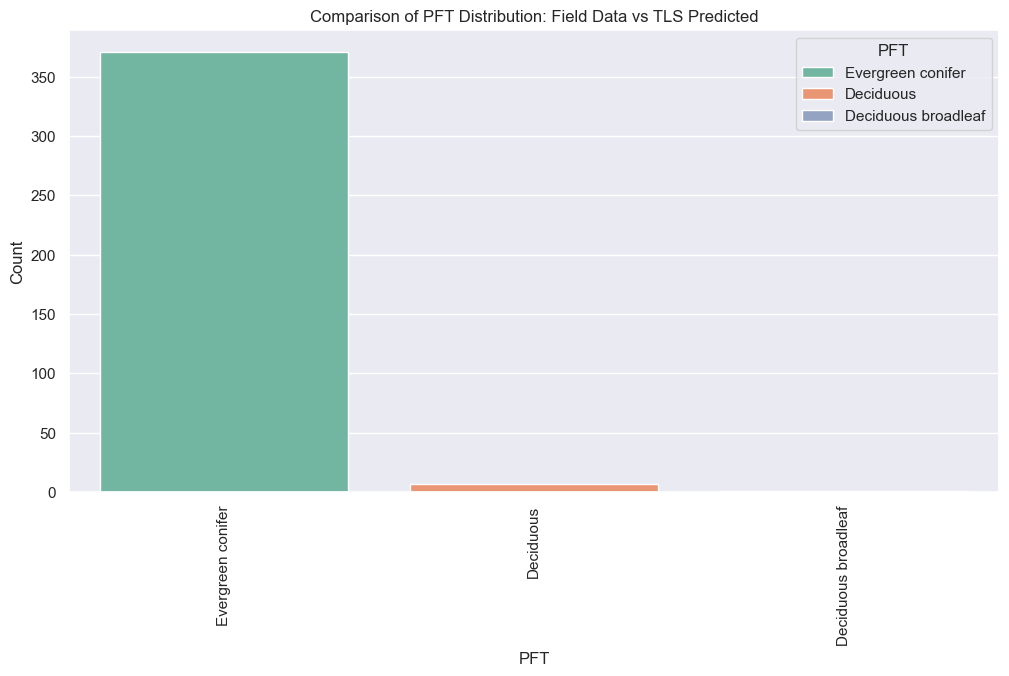

In [ ]:
# Merge the TLS data and field-collected data on 'inventory_id', 'plot_blk', and 'TreeID' (case-sensitive match)
merged_data = df_tls_data.merge(
    field_plot_filtered[['inventory_id', 'plot_blk', 'tree_id', 'PFT']],
    left_on=['inventory_id', 'plot_blk', 'TreeID'],  # Use 'TreeID' from TLS data
    right_on=['inventory_id', 'plot_blk', 'tree_id'],  # Use 'tree_id' from field data
    how='left'  # Left join to keep all rows from TLS data
)

# 2. Check if merge was successful and if any NaN values for PFT were introduced
print(f"Number of NaN values in merged 'PFT': {merged_data['PFT'].isna().sum()}")

# 3. Now we can compare the distributions of PFT in the field-collected data vs predicted PFT in the TLS data.
import seaborn as sns
import matplotlib.pyplot as plt

# 4. Plot the distributions of PFT in the field-collected data vs predicted PFT in the TLS data
plt.figure(figsize=(12, 6))
sns.countplot(x='PFT', data=merged_data, hue='PFT', palette='Set2')
plt.title('Comparison of PFT Distribution: Field Data vs TLS Predicted')
plt.xlabel('PFT')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 5. Optional: You could also use other statistical tests like chi-squared or KS test to quantify the distribution similarity.


In [ ]:
merged_data['PFT'].value_counts()
# find the percentage of each PFT in the merged data
pft_counts = merged_data['PFT'].value_counts(normalize=True) * 100
# Display the percentage of each PFT    
print(pft_counts)

PFT
Evergreen conifer     97.89
Deciduous              1.85
Deciduous broadleaf    0.26
Name: proportion, dtype: float64


In [ ]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,plot_slopeper,plot_aspectdegre,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em


In [ ]:
field_plot_filtered

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label,PFT
0,143_pre_SHA_burn3d,1,204,ABCO,abies concolor,NaN,Live,Live,8.20,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
1,143_pre_SHA_burn3d,2,205,ABCO,abies concolor,NaN,Live,Live,54.60,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
2,143_pre_SHA_burn3d,3,206,ABCO,abies concolor,NaN,Live,Live,86.90,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
3,143_pre_SHA_burn3d,4,207,ABCO,abies concolor,NaN,Live,Live,21.70,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
4,143_pre_SHA_burn3d,5,208,ABCO,abies concolor,NaN,Live,Live,45.30,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,46_pre_puc_burn3d,11,1155,NODE,notholicarpos densiflorus,NaN,Live,Live,35.60,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2143,46_pre_puc_burn3d,12,1156,NODE,notholicarpos densiflorus,NaN,Live,Live,43.70,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2144,46_pre_puc_burn3d,13,1157,PSME,pseudotsuga menziesii,NaN,Live,Live,71.40,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen conifer
2145,46_pre_puc_burn3d,14,1158,ARBMEN,arbutus menziesii,NaN,Live,Live,31.90,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen broadleaf


In [ ]:
df_tls_with_pft_field

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,plot_aspectdegre,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,PFT
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,89.00,-119.27,37.10,0,0,0,0,1,M261Ep,Evergreen conifer
1,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,89.00,-119.27,37.10,0,0,0,0,1,M261Ep,Evergreen conifer
2,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,89.00,-119.27,37.10,0,0,0,0,1,M261Ep,Evergreen conifer
3,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,89.00,-119.27,37.10,0,0,0,0,1,M261Ep,Evergreen conifer
4,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,89.00,-119.27,37.10,0,0,0,0,1,M261Ep,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13190,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,295.00,-114.22,38.25,0,0,0,1,0,M261Em,NaN
13191,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,295.00,-114.22,38.25,0,0,0,1,0,M261Em,NaN
13192,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,295.00,-114.22,38.25,0,0,0,1,0,M261Em,NaN
13193,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,295.00,-114.22,38.25,0,0,0,1,0,M261Em,NaN


In [ ]:
# Filter field_plot_filtered to keep only rows with Tree_id present in df_tls_data['TreeID']
# Display the filtered DataFrame
field_plot_filtered

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label,PFT
0,143_pre_SHA_burn3d,1,204,ABCO,abies concolor,NaN,Live,Live,8.20,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
1,143_pre_SHA_burn3d,2,205,ABCO,abies concolor,NaN,Live,Live,54.60,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
2,143_pre_SHA_burn3d,3,206,ABCO,abies concolor,NaN,Live,Live,86.90,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
3,143_pre_SHA_burn3d,4,207,ABCO,abies concolor,NaN,Live,Live,21.70,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
4,143_pre_SHA_burn3d,5,208,ABCO,abies concolor,NaN,Live,Live,45.30,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,46_pre_puc_burn3d,11,1155,NODE,notholicarpos densiflorus,NaN,Live,Live,35.60,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2143,46_pre_puc_burn3d,12,1156,NODE,notholicarpos densiflorus,NaN,Live,Live,43.70,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,NaN
2144,46_pre_puc_burn3d,13,1157,PSME,pseudotsuga menziesii,NaN,Live,Live,71.40,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen conifer
2145,46_pre_puc_burn3d,14,1158,ARBMEN,arbutus menziesii,NaN,Live,Live,31.90,NaN,...,1,70.00,60.00,22.00,2.00,0.00,1,3.00,Abigail,Evergreen broadleaf


In [ ]:
# Drop if field_plot_filtered["PFT"] is Deciduous
field_plot_filtered = field_plot_filtered[field_plot_filtered["PFT"] != "Deciduous"]

In [ ]:
# find the percentage of each PFT
pft_counts = field_plot_filtered['PFT'].value_counts(normalize=True) * 100
# Display the percentage of each PFT
print("Percentage of each PFT on Field:")
print(pft_counts)

Percentage of each PFT on Field:
PFT
Evergreen conifer     73.84
Evergreen broadleaf   19.51
Deciduous broadleaf    6.65
Name: proportion, dtype: float64


In [ ]:
field_plot_filtered['PFT'].value_counts()

PFT
Evergreen conifer      1499
Evergreen broadleaf     396
Deciduous broadleaf     135
Name: count, dtype: int64

In [ ]:
field_plot_filtered.drop_duplicates(subset=['tree_tag'], keep='first')["PFT"].value_counts()

PFT
Evergreen conifer      1096
Evergreen broadleaf     132
Deciduous broadleaf      84
Name: count, dtype: int64

In [ ]:
# convert the plot_blk to lowercase in both dataframes
df_tls_data['plot_blk'] = df_tls_data['plot_blk'].str.lower().str.strip()
field_plot_filtered['plot_blk'] = field_plot_filtered['plot_blk'].str.lower().str.strip()

In [ ]:
field_plot_filtered_unique = field_plot_filtered.drop_duplicates(subset='plot_blk')
field_plot_filtered_unique

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,...,veg_cover_id,veg_cover_tot_veg_percent,veg_cover_tov_percent,veg_cover_und_percent,veg_cover_tos_percent,veg_cover_herb_percent,sp_invcov_id,sp_cov_inv_obs,sp_cov_inv_obs_label,PFT
0,143_pre_SHA_burn3d,1,204,ABCO,abies concolor,NaN,Live,Live,8.20,NaN,...,1,50.00,40.00,4.00,0.00,10.00,1,3.00,Abigail,Evergreen conifer
14,140_pre_SHA_burn3d,1,87,SALIX,salix sp.,NaN,Live,Live,44.80,NaN,...,1,95.00,15.00,2.00,5.00,80.00,1,3.00,Abigail,NaN
32,152_pre_SHA_burn3d,1,73,ABCO,abies concolor,NaN,Live,Live,29.80,NaN,...,1,55.00,30.00,5.00,0.00,20.00,1,3.00,Abigail,Evergreen conifer
45,147_pre_SHA_burn3d,1,59,CADE,calocedrus decurrens,NaN,Live,Live,16.00,NaN,...,1,75.00,30.00,15.00,8.00,25.00,1,3.00,Abigail,Evergreen conifer
64,151_pre_SHA_burn3d,1,42,CADE,calocedrus decurrens,NaN,Live,Live,36.00,NaN,...,1,75.00,50.00,5.00,2.00,40.00,1,3.00,Abigail,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,40_pre_puc_burn3d,1,1217,PSME,pseudotsuga menziesii,NaN,Live,Live,91.00,NaN,...,1,40.00,40.00,3.00,0.00,0.00,1,3.00,Abigail,Evergreen conifer
2085,41_pre_puc_burn3d,1,1201,ARBMEN,arbutus menziesii,NaN,Live,Live,24.10,NaN,...,1,85.00,80.00,45.00,0.00,0.00,1,3.00,Abigail,Evergreen broadleaf
2104,45_pre_puc_burn3d,1,1168,PSME,pseudotsuga menziesii,NaN,Live,Live,34.50,NaN,...,1,80.00,75.00,15.00,1.00,0.00,1,3.00,Abigail,Evergreen conifer
2123,44_pre_puc_burn3d,1,1160,PSME,pseudotsuga menziesii,NaN,Live,Live,75.50,NaN,...,1,40.00,35.00,5.00,0.00,0.00,1,3.00,Abigail,Evergreen conifer


In [ ]:
df_tls_data = df_tls_data.merge(
    field_plot_filtered_unique[['plot_blk', 'PFT']],
    on='plot_blk',
    how='left',
    suffixes=('', '_field')
)
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD,PFT,PFT_field,PFT_field,PFT_field,PFT_field
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,0,0,0,1,M261Ep,Evergreen conifer,Evergreen conifer,Evergreen conifer,NaN,Evergreen conifer
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,0,0,0,1,M261Ep,Evergreen conifer,Evergreen conifer,Evergreen conifer,NaN,Evergreen conifer
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,0,0,0,1,M261Ep,Evergreen conifer,Evergreen conifer,Evergreen conifer,NaN,Evergreen conifer
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,0,0,0,1,M261Ep,Evergreen conifer,Evergreen conifer,Evergreen conifer,NaN,Evergreen conifer
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,0,0,0,1,M261Ep,Evergreen conifer,Evergreen conifer,Evergreen conifer,NaN,Evergreen conifer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,0,0,1,0,M261Em,NaN,NaN,NaN,NaN,NaN
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,0,0,1,0,M261Em,NaN,NaN,NaN,NaN,NaN
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,0,0,1,0,M261Em,NaN,NaN,NaN,NaN,NaN
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,0,0,1,0,M261Em,NaN,NaN,NaN,NaN,NaN


In [ ]:
df  = pd.read_csv("FIA/FIATreeSpeciesCode_pft.csv", sep=";")
df = df[['SPCD', 'SCI_NAME', 'PFT']].copy()

In [ ]:
df_1 = pd.read_csv("Field/03_tree.csv")
df_1 = df_1[['tree_id', 'tree_sp_scientific_name']].copy()

In [ ]:
df_2 = pd.read_csv("TLS/TLS_treelist.csv")
df_2 = df_2[['plot_blk', 'TreeID']].copy()

In [ ]:
# Convert both columns to lowercase and strip whitespace for matching
df_1['tree_sp_scientific_name'] = df_1['tree_sp_scientific_name'].str.lower().str.strip()
df['SCI_NAME'] = df['SCI_NAME'].str.lower().str.strip()

# Merge df_1 with df to add the PFT column
df_1 = df_1.merge(df[['SCI_NAME', 'PFT']], left_on='tree_sp_scientific_name', right_on='SCI_NAME', how='left')

# Drop the redundant SCI_NAME column after the merge
df_1.drop(columns=['SCI_NAME'], inplace=True)

# Display the updated DataFrame
df_1.head()

,tree_id,tree_sp_scientific_name,PFT
0,1,abies concolor,Evergreen conifer
1,2,abies concolor,Evergreen conifer
2,3,abies concolor,Evergreen conifer
3,4,abies concolor,Evergreen conifer
4,5,abies concolor,Evergreen conifer


In [ ]:
df_1

,tree_id,tree_sp_scientific_name,PFT
0,1,abies concolor,Evergreen conifer
1,2,abies concolor,Evergreen conifer
2,3,abies concolor,Evergreen conifer
3,4,abies concolor,Evergreen conifer
4,5,abies concolor,Evergreen conifer
...,...,...,...
2142,11,notholicarpos densiflorus,NaN
2143,12,notholicarpos densiflorus,NaN
2144,13,pseudotsuga menziesii,Evergreen conifer
2145,14,arbutus menziesii,Evergreen broadleaf


In [ ]:
df_tls_data["PFT"].isna().sum()

833

In [ ]:
# find duplicate tree_tag rows 
duplicates = field_plot_filtered[field_plot_filtered.duplicated(subset=['tree_tag'], keep=False)]
# drop the duplicates from the field_plot_filtered DataFrame
field_plot_filtered.drop_duplicates(subset=['tree_tag'], keep='first')["PFT"].value_counts()
# find the percentage of each PFT
pft_counts = field_plot_filtered.drop_duplicates(subset=['tree_tag'], keep='first')["PFT"].value_counts(normalize=True) * 100
# Display the percentage of each PFT
print("Percentage of each PFT on Field after dropping duplicates:")
print(pft_counts)

Percentage of each PFT on Field after dropping duplicates:
PFT
Evergreen conifer     83.54
Evergreen broadleaf   10.06
Deciduous broadleaf    6.40
Name: proportion, dtype: float64


## GENUS

In [ ]:
df_ref_species = pd.read_csv('./FIA/REF_SPECIES.csv')
df_ref_species = df_ref_species[['SPCD', 'GENUS', 'SPECIES', 'COMMON_NAME']].copy()
print(f"Shape: {df_ref_species.shape}")
df_ref_species.head()

Shape: (2677, 4)


,SPCD,GENUS,SPECIES,COMMON_NAME
0,6156.00,Araucaria,excelsa,Norfolk Island pine
1,6157.00,Araucaria,heterophylla,Norfolk Island pine
2,6158.00,Araucaria,spp.,Araucaria
3,6159.00,Archontophoenix,alexandrae,Alexandra palm
4,6160.00,Archontophoenix,cunninghamiana,Bangalow palm


In [ ]:
df_encoded

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm
0,6.10,25.00,37.51,-119.74,4,evergreen conifer,0,0,0,1,0,81.00,15.49
1,1.00,7.00,38.15,-120.06,3,evergreen conifer,1,0,0,1,1,15.00,2.54
2,16.80,66.00,37.08,-119.38,4,evergreen conifer,0,0,0,1,0,81.00,42.67
3,17.20,49.00,38.61,-120.37,3,evergreen conifer,0,0,0,1,0,81.00,43.69
4,7.80,40.00,37.37,-119.54,4,evergreen conifer,0,0,0,1,0,117.00,19.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23721,17.60,57.00,38.00,-120.03,3,evergreen conifer,1,0,0,1,1,122.00,44.70
23722,7.20,28.00,36.21,-118.66,4,deciduous broadleaf,0,0,0,0,0,818.00,18.29
23723,2.00,10.00,37.10,-119.36,4,evergreen conifer,0,0,0,1,0,81.00,5.08
23724,6.00,20.00,35.57,-118.65,4,deciduous broadleaf,0,0,0,0,0,333.00,15.24


In [ ]:
df_encoded = df_encoded.merge(df_ref_species, on="SPCD", how="left")
print(f"Shape: {df_encoded.shape}")
df_encoded.head()

Shape: (23724, 16)


,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm,GENUS,SPECIES,COMMON_NAME
0,6.10,25.00,37.51,-119.74,4,evergreen conifer,0,0,0,1,0,81.00,15.49,Calocedrus,decurrens,incense-cedar
1,1.00,7.00,38.15,-120.06,3,evergreen conifer,1,0,0,1,1,15.00,2.54,Abies,concolor,white fir
2,16.80,66.00,37.08,-119.38,4,evergreen conifer,0,0,0,1,0,81.00,42.67,Calocedrus,decurrens,incense-cedar
3,17.20,49.00,38.61,-120.37,3,evergreen conifer,0,0,0,1,0,81.00,43.69,Calocedrus,decurrens,incense-cedar
4,7.80,40.00,37.37,-119.54,4,evergreen conifer,0,0,0,1,0,117.00,19.81,Pinus,lambertiana,sugar pine


In [ ]:
df_encoded['GENUS'].value_counts()

GENUS
Pinus             5981
Quercus           5489
Calocedrus        5072
Abies             5058
Pseudotsuga        654
Umbellularia       425
Arbutus            229
Aesculus           169
Cornus             125
Cercocarpus        118
Acer                76
Juniperus           68
Sequoia             57
Lithocarpus         57
Alnus               43
Sequoiadendron      34
Populus             30
Prunus              15
Torreya              6
Cupressus            6
Fraxinus             5
Platanus             4
Eucalyptus           3
Name: count, dtype: int64

In [ ]:
df_encoded['PFT'] = df_encoded['PFT'].astype('category')
df_encoded.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm,GENUS,SPECIES,COMMON_NAME
0,6.10,25.00,37.51,-119.74,4,evergreen conifer,0,0,0,1,0,81.00,15.49,Calocedrus,decurrens,incense-cedar
1,1.00,7.00,38.15,-120.06,3,evergreen conifer,1,0,0,1,1,15.00,2.54,Abies,concolor,white fir
2,16.80,66.00,37.08,-119.38,4,evergreen conifer,0,0,0,1,0,81.00,42.67,Calocedrus,decurrens,incense-cedar
3,17.20,49.00,38.61,-120.37,3,evergreen conifer,0,0,0,1,0,81.00,43.69,Calocedrus,decurrens,incense-cedar
4,7.80,40.00,37.37,-119.54,4,evergreen conifer,0,0,0,1,0,117.00,19.81,Pinus,lambertiana,sugar pine


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

# --- Prepare dataset -----------------------------------------------------------
include_vars = ["DIA", "HT", "PFT", "LAT", "LON",
                "ECOSUBCD", "GENUS", 'OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']

df = df_encoded[include_vars].dropna().copy()  

# Treat categorical columns properly
cat_cols = ["ECOSUBCD", "PFT"]
for col in cat_cols:
    df[col] = df[col].astype("category")

X = df.drop(columns=["GENUS","PFT"])
y = df["GENUS"]

# --- Train-test split -----------------------------------------------------------
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.35, random_state=42
)

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test  = le.transform(y_test_raw)

# --- Fit XGBoost ---------------------------------------------------------------
model = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    objective="multi:softmax",   # Direct label output
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    use_label_encoder=False,     # Important for newer XGBoost versions
    random_state=42
)

model.fit(X_train, y_train)

# --- Evaluate -----------------------------------------------------------------
pred = model.predict(X_test)

# Ensure only present labels are shown
labels = unique_labels(y_test, pred)

# Generate classification report
report = classification_report(
    y_test,
    pred,
    labels=labels,
    target_names=le.inverse_transform(labels),
    zero_division=0,
)

print(report)

                precision    recall  f1-score   support

         Abies       0.93      0.95      0.94      1033
          Acer       1.00      1.00      1.00        15
      Aesculus       0.81      0.68      0.74        37
         Alnus       0.67      0.15      0.25        13
       Arbutus       0.98      0.96      0.97        46
    Calocedrus       0.90      0.95      0.93      1028
   Cercocarpus       1.00      0.95      0.98        21
        Cornus       1.00      1.00      1.00        20
     Juniperus       0.73      0.57      0.64        14
   Lithocarpus       0.62      0.83      0.71         6
         Pinus       0.89      0.85      0.87      1145
       Populus       1.00      0.60      0.75         5
        Prunus       1.00      0.33      0.50         3
   Pseudotsuga       1.00      1.00      1.00       127
       Quercus       0.97      0.99      0.98      1133
       Sequoia       1.00      0.80      0.89        15
Sequoiadendron       1.00      0.62      0.77  

In [ ]:
X 

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,6.10,25.00,37.51,-119.74,4,0,0,0,1,0
1,1.00,7.00,38.15,-120.06,3,1,0,0,1,1
2,16.80,66.00,37.08,-119.38,4,0,0,0,1,0
3,17.20,49.00,38.61,-120.37,3,0,0,0,1,0
4,7.80,40.00,37.37,-119.54,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
23719,17.60,57.00,38.00,-120.03,3,1,0,0,1,1
23720,7.20,28.00,36.21,-118.66,4,0,0,0,0,0
23721,2.00,10.00,37.10,-119.36,4,0,0,0,1,0
23722,6.00,20.00,35.57,-118.65,4,0,0,0,0,0


In [ ]:
y 

0        Calocedrus
1             Abies
2        Calocedrus
3        Calocedrus
4             Pinus
            ...    
23719         Pinus
23720       Quercus
23721    Calocedrus
23722      Aesculus
23723         Pinus
Name: GENUS, Length: 23724, dtype: object

In [ ]:
model = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    objective="multi:softmax",   # Direct label output
    eval_metric="mlogloss",
    tree_method="hist",
    enable_categorical=True,
    use_label_encoder=False,     # Important for newer XGBoost versions
    random_state=42
)

In [ ]:
le_genus = LabelEncoder()
y = le_genus.fit_transform(y)
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
TLS_X

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,predicted_genus
0,20.99,12.56,37.10,-119.27,4,0,0,0,0,1,18
1,13.11,8.74,37.10,-119.27,4,0,0,0,0,1,2
2,59.84,13.47,37.10,-119.27,4,0,0,0,0,1,18
3,21.04,18.14,37.10,-119.27,4,0,0,0,0,1,18
4,16.39,13.79,37.10,-119.27,4,0,0,0,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...
1377,17.32,30.63,38.25,-114.22,3,0,0,0,1,0,13
1378,24.25,23.08,38.25,-114.22,3,0,0,0,1,0,11
1379,17.84,30.13,38.25,-114.22,3,0,0,0,1,0,13
1380,14.21,29.30,38.25,-114.22,3,0,0,0,1,0,13


In [ ]:
pred =  model.predict(TLS_X.drop(columns=['predicted_genus']))

In [ ]:
# Use le_genus.inverse_transform(pred)
predicted_genus = le_genus.inverse_transform(pred)
# Add the predicted genus to the TLS_X DataFrame
TLS_X['predicted_genus'] = predicted_genus

In [ ]:
TLS_X 

,DIA,HT,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,predicted_genus
0,20.99,12.56,37.10,-119.27,4,0,0,0,0,1,2
1,13.11,8.74,37.10,-119.27,4,0,0,0,0,1,2
2,59.84,13.47,37.10,-119.27,4,0,0,0,0,1,2
3,21.04,18.14,37.10,-119.27,4,0,0,0,0,1,2
4,16.39,13.79,37.10,-119.27,4,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
1377,17.32,30.63,38.25,-114.22,3,0,0,0,1,0,13
1378,24.25,23.08,38.25,-114.22,3,0,0,0,1,0,13
1379,17.84,30.13,38.25,-114.22,3,0,0,0,1,0,13
1380,14.21,29.30,38.25,-114.22,3,0,0,0,1,0,13


In [ ]:
TLS_X['predicted_genus'].value_counts()

predicted_genus
13    879
18    273
1     114
2      88
11     20
7       8
Name: count, dtype: int64

In [ ]:
# find percentage of each predicted genus
predicted_genus_counts = TLS_X['predicted_genus'].value_counts(normalize=True) * 100
# Display the percentage of each predicted genus
print("Percentage of each predicted genus:")
print(predicted_genus_counts)


Percentage of each predicted genus:
predicted_genus
13   63.60
18   19.75
1     8.25
2     6.37
11    1.45
7     0.58
Name: proportion, dtype: float64


## SPECIES TYPE

In [ ]:
df_encoded['SPECIES'].value_counts()

SPECIES
decurrens       5072
concolor        4563
ponderosa       2835
chrysolepis     2245
kelloggii       1802
jeffreyi        1632
lambertiana     1099
menziesii        883
californica      596
wislizeni        566
magnifica        495
agrifolia        433
garryana         258
contorta         191
douglasii        158
nuttallii        125
ledifolius       118
washoensis        89
sabiniana         82
macrophyllum      76
occidentalis      68
densiflorus       57
sempervirens      57
rhombifolia       42
giganteum         34
lobata            27
tremuloides       26
monophylla        26
monticola         22
emarginata        15
sargentii          6
latifolia          5
spp.               4
balsamifera        4
attenuata          4
racemosa           4
globulus           3
rubra              1
coulteri           1
Name: count, dtype: int64

In [ ]:
# Drop classes with fewer than, say, 50 samples
min_count = 50
class_counts = df_encoded["SPECIES"].value_counts()
valid_classes = class_counts[class_counts >= min_count].index.tolist()

df_encoded = df_encoded[df_encoded["SPECIES"].isin(valid_classes)]
df_encoded.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,SPCD,DIA_cm,GENUS,SPECIES,COMMON_NAME
0,6.10,25.00,37.51,-119.74,4,evergreen conifer,0,0,0,1,0,81.00,15.49,Calocedrus,decurrens,incense-cedar
1,1.00,7.00,38.15,-120.06,3,evergreen conifer,1,0,0,1,1,15.00,2.54,Abies,concolor,white fir
2,16.80,66.00,37.08,-119.38,4,evergreen conifer,0,0,0,1,0,81.00,42.67,Calocedrus,decurrens,incense-cedar
3,17.20,49.00,38.61,-120.37,3,evergreen conifer,0,0,0,1,0,81.00,43.69,Calocedrus,decurrens,incense-cedar
4,7.80,40.00,37.37,-119.54,4,evergreen conifer,0,0,0,1,0,117.00,19.81,Pinus,lambertiana,sugar pine


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import pandas as pd

# --- build the modelling frame ------------------------------------------------
include_vars = ["DIA", "HT", "PFT","GENUS", "LAT", "LON",
                "ECOSUBCD", "SPECIES",'OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']

df = df_encoded[include_vars].dropna().copy()      # <- .copy() keeps dtype changes
df["PFT"] = df["PFT"].astype("category")           # <- convert ON THE SAME DF
df["GENUS"] = df["GENUS"].astype("category")   

X = df.drop(columns=["PFT", "SPECIES","GENUS"])
y = df["SPECIES"]

# --- split & encode target ----------------------------------------------------
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.35, random_state=42
)

le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test  = le.transform(y_test_raw)

# --- fit XGBoost with categorical support ------------------------------------
model = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    objective="multi:softmax",
    eval_metric="mlogloss",
    tree_method="hist",         
    enable_categorical=True     
)

model.fit(X_train, y_train)

# --- evaluate -----------------------------------------------------------------
pred = model.predict(X_test)
report = classification_report(y_test, pred, target_names=le.classes_, zero_division=0)
print(report)

              precision    recall  f1-score   support

   agrifolia       0.92      0.87      0.89        82
 californica       0.77      0.84      0.81       102
 chrysolepis       0.84      0.93      0.88       423
    concolor       0.92      0.95      0.94       906
    contorta       1.00      1.00      1.00        28
   decurrens       0.91      0.95      0.93      1008
 densiflorus       0.88      0.54      0.67        13
   douglasii       0.91      0.75      0.82        28
    garryana       0.91      0.80      0.85        61
    jeffreyi       0.87      0.92      0.89       330
   kelloggii       0.88      0.85      0.87       367
 lambertiana       0.84      0.62      0.71       238
  ledifolius       1.00      1.00      1.00        24
macrophyllum       1.00      1.00      1.00        14
   magnifica       0.96      0.97      0.97       108
   menziesii       0.99      0.99      0.99       174
   nuttallii       1.00      1.00      1.00        33
occidentalis       0.75    

In [ ]:
le_species = LabelEncoder()
y = le_species.fit_transform(y)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
model.predict(TLS_X.drop(columns=["predicted_genus"]))

NameError: name 'model' is not defined